# Homework 1
Christopher Beam

800927396

## Problem 1

In [1]:
# Setup
import torch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Get dataset
df = pd.read_csv("../datasets/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Linear Regression and Gradient_descent

def lineReg(X, Y, theta):
    pred = X.dot(theta)
    errors = np.square(np.subtract(pred,Y))
    return 1 / (2 * len(Y)) * np.sum(errors)

def gradDes(X_train, Y_train, X_test, Y_test, theta, alpha, iterations):
    costArray = np.zeros(iterations)
    valArray = np.zeros(iterations)

    for i in range(iterations):
        pred = X_train.dot(theta)
        errors = np.subtract(pred, Y_train)
        delta = (alpha / len(Y_train)) * X_train.transpose().dot(errors)
        theta = theta - delta
        costArray[i] = lineReg(X_train, Y_train, theta)
        valArray[i] = lineReg(X_test, Y_test, theta)
    return theta, costArray, valArray

def gradDes_paramPen(X_train, Y_train, X_test, Y_test, theta, alpha, iterations, beta):
    costArray = np.zeros(iterations)
    valArray = np.zeros(iterations)

    for i in range(iterations):
        pred = X_train.dot(theta)
        errors = np.subtract(pred, Y_train)
        delta = (alpha / len(Y_train)) * (X_train.transpose().dot(errors) + beta*theta)
        theta = theta - delta
        costArray[i] = lineReg(X_train, Y_train, theta)
        valArray[i] = lineReg(X_test, Y_test, theta)
    return theta, costArray, valArray

In [4]:
Y = df.values[:,0]
trainLen = round(0.8 * len(Y))
tempOnes = np.ones((len(Y), 1))
iterations = 100

In [5]:
trainIndices = np.random.choice(range(len(Y)), size=trainLen, replace=False)
testIndices = np.array(list(set([i for i in range(len(Y))]) - set(trainIndices)))

In [6]:
train_Y = np.take(Y, trainIndices, axis=0)
test_Y = np.take(Y, testIndices, axis=0)

### Part a

In [7]:
X1a_val = df.values[:,[1,2,3,4,10]]
X1a_val = X1a_val.astype("float64")
X1a = np.hstack((tempOnes, X1a_val))
X1a_train = np.take(X1a, trainIndices, axis=0)
X1a_test = np.take(X1a, testIndices, axis=0)


/tmp/ipykernel_2676/3903407539.py:5: RuntimeWarning: overflow encountered in square
  errors = np.square(np.subtract(pred,Y))
/tmp/ipykernel_2676/3903407539.py:16: RuntimeWarning: invalid value encountered in subtract
  theta = theta - delta
/home/grey/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Learn rate with lowest error is 0.01, min error = nan
Variables Found:
	theta0 = nan
	theta1 = nan
	theta2 = nan
	theta3 = nan
	theta4 = nan
	theta5 = nan


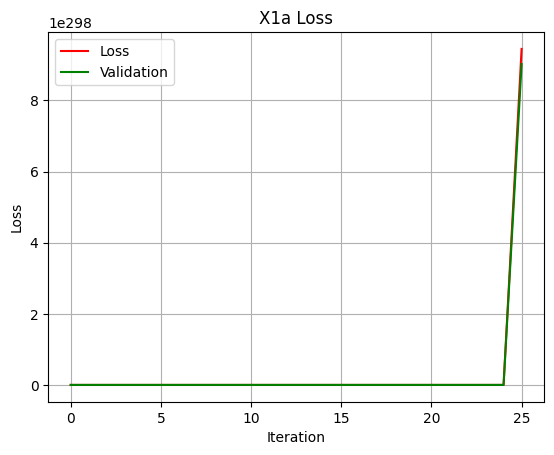

In [8]:
# Perform regression

learnSize = 20
learnRange = np.linspace(0.01, 0.1, learnSize, endpoint=True)
errorOut = []
thetaArray = []
lossArray = []
valArray = []
for learnRate in learnRange:
    theta_x1a = np.zeros(6)
    theta_x1a, loss, val = gradDes(X1a_train, train_Y, X1a_test, test_Y, theta_x1a, learnRate, iterations)
    lossArray.append(loss)
    valArray.append(val)
    thetaArray.append(theta_x1a)
    errorOut.append(lineReg(X1a_test, test_Y, theta_x1a))

idx = np.argmin(errorOut)
print("Learn rate with lowest error is {:.2f}, min error = {:f}".format(learnRange[idx], np.min(errorOut)))
print("Variables Found:\n\ttheta0 = {:.5f}\n\ttheta1 = {:.5f}\n\ttheta2 = {:.5f}\n\ttheta3 = {:.5f}\n\ttheta4 = {:.5f}\n\ttheta5 = {:.5f}".format(
    thetaArray[idx][0], thetaArray[idx][1], thetaArray[idx][2], thetaArray[idx][3], thetaArray[idx][4], thetaArray[idx][5])
)
plt.plot(range(iterations),lossArray[idx], color="red", label = "Loss")
plt.plot(range(iterations),valArray[idx], color="green", label = "Validation")
plt.title("X1a Loss")
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.grid()
plt.legend()

### Part b

In [9]:
X1b_val = df.values[:,1:12]
for iii in range(len(Y)):
    for idx in [4,5,6,7,8,10]:
        if X1b_val[iii,idx] == "yes":
            X1b_val[iii][idx] = 1
        else:
            X1b_val[iii][idx] = 0
X1b_val = X1b_val.astype("float64")
X1b = np.hstack((tempOnes, X1b_val))
X1b_train = np.take(X1b, trainIndices, axis=0)
X1b_test = np.take(X1b, testIndices, axis=0)

/tmp/ipykernel_2676/3903407539.py:5: RuntimeWarning: overflow encountered in square
  errors = np.square(np.subtract(pred,Y))
/tmp/ipykernel_2676/3903407539.py:16: RuntimeWarning: invalid value encountered in subtract
  theta = theta - delta


Learn rate with lowest error is 0.01, min error = nan
Variables Found:
	theta0 = nan
	theta1 = nan
	theta2 = nan
	theta3 = nan
	theta4 = nan
	theta5 = nan
	theta6 = nan
	theta7 = nan
	theta8 = nan
	theta9 = nan
	theta10 = nan
	theta11 = nan


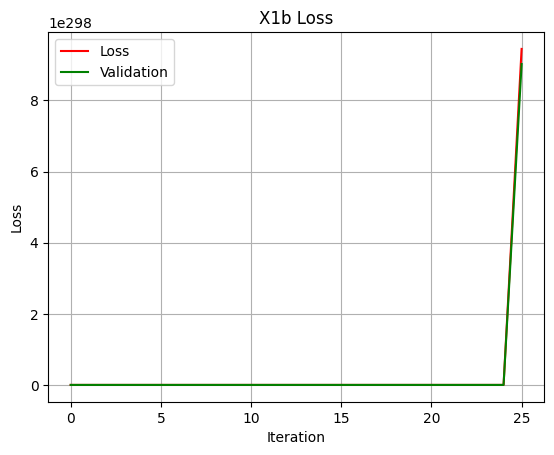

In [10]:
# Perform regression

learnSize = 20
learnRange = np.linspace(0.01, 0.1, learnSize, endpoint=True)
errorOut = []
thetaArray = []
lossArray = []
valArray = []
for learnRate in learnRange:
    theta_x1b = np.zeros(12)
    theta_x1b, loss, val = gradDes(X1b_train, train_Y, X1b_test, test_Y, theta_x1b, learnRate, iterations)
    lossArray.append(loss)
    valArray.append(val)
    thetaArray.append(theta_x1b)
    errorOut.append(lineReg(X1b_test, test_Y, theta_x1b))

idx = np.argmin(errorOut)
print("Learn rate with lowest error is {:.2f}, min error = {:f}".format(learnRange[idx], np.min(errorOut)))
print("Variables Found:\n\ttheta0 = {:.5f}\n\ttheta1 = {:.5f}\n\ttheta2 = {:.5f}\n\ttheta3 = {:.5f}\n\ttheta4 = {:.5f}\n\ttheta5 = {:.5f}\n\ttheta6 = {:.5f}\n\ttheta7 = {:.5f}\n\ttheta8 = {:.5f}\n\ttheta9 = {:.5f}\n\ttheta10 = {:.5f}\n\ttheta11 = {:.5f}".format(
    thetaArray[idx][0], thetaArray[idx][1], thetaArray[idx][2], thetaArray[idx][3], thetaArray[idx][4], thetaArray[idx][5], thetaArray[idx][6], thetaArray[idx][7], thetaArray[idx][8], thetaArray[idx][9], thetaArray[idx][10], thetaArray[idx][11])
)
plt.plot(range(iterations),lossArray[idx], color="red", label = "Loss")
plt.plot(range(iterations),valArray[idx], color="green", label = "Validation")
plt.title("X1b Loss")
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.grid()
plt.legend()

## Problem 2

In [11]:
# Importing functions for normalization and standarization
from sklearn.preprocessing import Normalizer, StandardScaler

### Part a

In [12]:
X2a_norm = Normalizer().fit(X1a_val)
X2a_std = StandardScaler().fit(X1a_val)

X2a_norm_vals = X2a_norm.transform(X1a_val)
X2a_std_vals = X2a_std.transform(X1a_val)

X2a_norm_vals = np.hstack((tempOnes, X2a_norm_vals))
X2a_std_vals = np.hstack((tempOnes, X2a_std_vals))

X2a_norm_train = np.take(X2a_norm_vals, trainIndices, axis=0)
X2a_norm_test = np.take(X2a_norm_vals, testIndices, axis=0)

X2a_std_train = np.take(X2a_std_vals, trainIndices, axis=0)
X2a_std_test = np.take(X2a_std_vals, testIndices, axis=0)


Learn rate with lowest error is 0.10, min error = 1905816911322.359863
Variables Found:
	theta0 = 2367805.99491
	theta1 = 2367806.67474
	theta2 = -183.80278
	theta3 = 387.21773
	theta4 = 579.95825
	theta5 = 803.45118


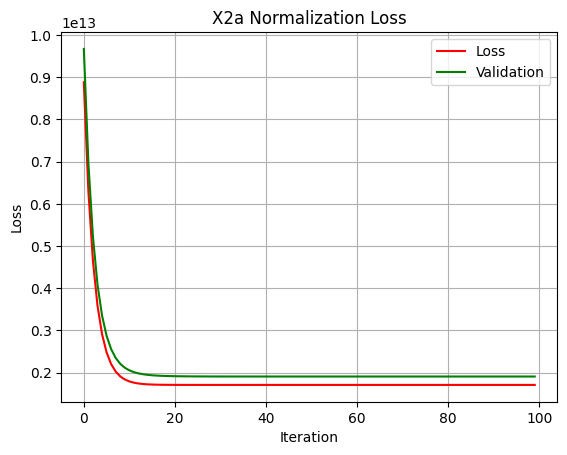

In [13]:
# Perform regression on normalized inputs

learnSize = 20
learnRange = np.linspace(0.01, 0.1, learnSize, endpoint=True)
errorOut = []
thetaArray = []
lossArray = []
valArray = []
for learnRate in learnRange:
    theta_x2a_norm = np.zeros(6)
    theta_x2a_norm, loss, val = gradDes(X2a_norm_train, train_Y, X2a_norm_test, test_Y, theta_x2a_norm, learnRate, iterations)
    lossArray.append(loss)
    valArray.append(val)
    thetaArray.append(theta_x2a_norm)
    errorOut.append(lineReg(X2a_norm_test, test_Y, theta_x2a_norm))

idx = np.argmin(errorOut)
print("Learn rate with lowest error is {:.2f}, min error = {:f}".format(learnRange[idx], np.min(errorOut)))
print("Variables Found:\n\ttheta0 = {:.5f}\n\ttheta1 = {:.5f}\n\ttheta2 = {:.5f}\n\ttheta3 = {:.5f}\n\ttheta4 = {:.5f}\n\ttheta5 = {:.5f}".format(
    thetaArray[idx][0], thetaArray[idx][1], thetaArray[idx][2], thetaArray[idx][3], thetaArray[idx][4], thetaArray[idx][5])
)

plt.plot(range(iterations),lossArray[idx], color="red", label = "Loss")
plt.plot(range(iterations),valArray[idx], color="green", label = "Validation")
plt.title("X2a Normalization Loss")
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.grid()
plt.legend()

Learn rate with lowest error is 0.08, min error = 853684540940.673340
Variables Found:
	theta0 = 4725893.06798
	theta1 = 742786.29832
	theta2 = 90886.01483
	theta3 = 571843.27895
	theta4 = 491150.87344
	theta5 = 290414.10250


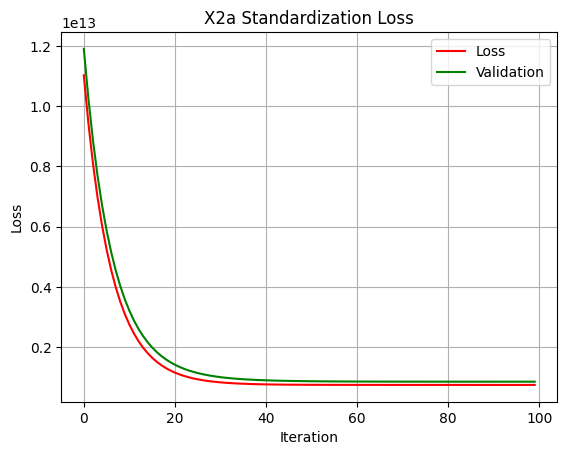

In [14]:
# Perform regression on standardized inputs

learnSize = 20
learnRange = np.linspace(0.01, 0.1, learnSize, endpoint=True)
errorOut = []
thetaArray = []
lossArray = []
valArray = []
for learnRate in learnRange:
    theta_x2a_std = np.zeros(6)
    theta_x2a_std, loss, val = gradDes(X2a_std_train, train_Y, X2a_std_test, test_Y, theta_x2a_std, learnRate, iterations)
    lossArray.append(loss)
    valArray.append(val)
    thetaArray.append(theta_x2a_std)
    errorOut.append(lineReg(X2a_std_test, test_Y, theta_x2a_std))

idx = np.argmin(errorOut)
print("Learn rate with lowest error is {:.2f}, min error = {:f}".format(learnRange[idx], np.min(errorOut)))
print("Variables Found:\n\ttheta0 = {:.5f}\n\ttheta1 = {:.5f}\n\ttheta2 = {:.5f}\n\ttheta3 = {:.5f}\n\ttheta4 = {:.5f}\n\ttheta5 = {:.5f}".format(
    thetaArray[idx][0], thetaArray[idx][1], thetaArray[idx][2], thetaArray[idx][3], thetaArray[idx][4], thetaArray[idx][5])
)

plt.plot(range(iterations),lossArray[idx], color="red", label = "Loss")
plt.plot(range(iterations),valArray[idx], color="green", label = "Validation")
plt.title("X2a Standardization Loss")
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.grid()
plt.legend()

### Part b

In [15]:
X2b_norm = Normalizer().fit(X1b_val)
X2b_std = StandardScaler().fit(X1b_val)

X2b_norm_vals = X2b_norm.transform(X1b_val)
X2b_std_vals = X2b_std.transform(X1b_val)

X2b_norm_vals = np.hstack((tempOnes, X2b_norm_vals))
X2b_std_vals = np.hstack((tempOnes, X2b_std_vals))

X2b_norm_train = np.take(X2b_norm_vals, trainIndices, axis=0)
X2b_norm_test = np.take(X2b_norm_vals, testIndices, axis=0)

X2b_std_train = np.take(X2b_std_vals, trainIndices, axis=0)
X2b_std_test = np.take(X2b_std_vals, testIndices, axis=0)

Learn rate with lowest error is 0.10, min error = 1905816838812.503906
Variables Found:
	theta0 = 2367806.00270
	theta1 = 2367806.68216
	theta2 = -183.80251
	theta3 = 387.21782
	theta4 = 579.95841
	theta5 = 130.77276


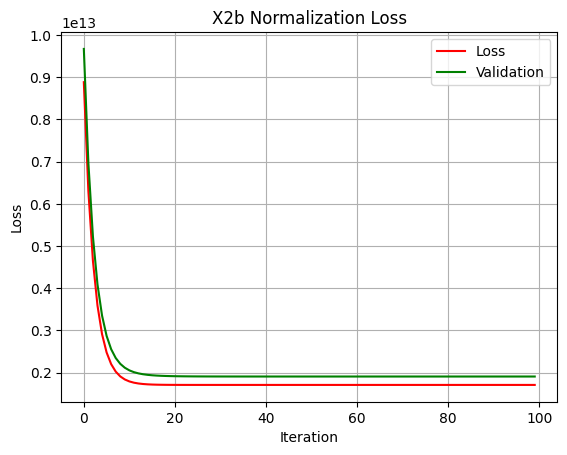

In [16]:
# Perform regression on normalized inputs

learnSize = 20
learnRange = np.linspace(0.01, 0.1, learnSize, endpoint=True)
errorOut = []
thetaArray = []
lossArray = []
valArray = []
for learnRate in learnRange:
    theta_x2b_norm = np.zeros(12)
    theta_x2b_norm, loss, val = gradDes(X2b_norm_train, train_Y, X2b_norm_test, test_Y, theta_x2b_norm, learnRate, iterations)
    lossArray.append(loss)
    valArray.append(val)
    thetaArray.append(theta_x2b_norm)
    errorOut.append(lineReg(X2b_norm_test, test_Y, theta_x2b_norm))

idx = np.argmin(errorOut)
print("Learn rate with lowest error is {:.2f}, min error = {:f}".format(learnRange[idx], np.min(errorOut)))
print("Variables Found:\n\ttheta0 = {:.5f}\n\ttheta1 = {:.5f}\n\ttheta2 = {:.5f}\n\ttheta3 = {:.5f}\n\ttheta4 = {:.5f}\n\ttheta5 = {:.5f}".format(
    thetaArray[idx][0], thetaArray[idx][1], thetaArray[idx][2], thetaArray[idx][3], thetaArray[idx][4], thetaArray[idx][5])
)

plt.plot(range(iterations),lossArray[idx], color="red", label = "Loss")
plt.plot(range(iterations),valArray[idx], color="green", label = "Validation")
plt.title("X2b Normalization Loss")
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.grid()
plt.legend()

Learn rate with lowest error is 0.09, min error = 687592865845.584961
Variables Found:
	theta0 = 4727648.98312
	theta1 = 554830.33292
	theta2 = 59650.21036
	theta3 = 533126.38456
	theta4 = 401952.25308
	theta5 = 149531.31990


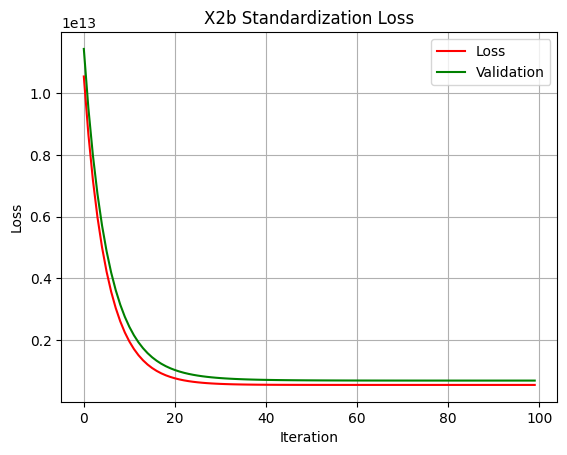

In [17]:
# Perform regression on standardized inputs

learnSize = 20
learnRange = np.linspace(0.01, 0.1, learnSize, endpoint=True)
errorOut = []
thetaArray = []
lossArray = []
valArray = []
for learnRate in learnRange:
    theta_x2b_std = np.zeros(12)
    theta_x2b_std, loss, val = gradDes(X2b_std_train, train_Y, X2b_std_test, test_Y, theta_x2b_std, learnRate, iterations)
    lossArray.append(loss)
    valArray.append(val)
    thetaArray.append(theta_x2b_std)
    errorOut.append(lineReg(X2b_std_test, test_Y, theta_x2b_std))

idx = np.argmin(errorOut)
print("Learn rate with lowest error is {:.2f}, min error = {:f}".format(learnRange[idx], np.min(errorOut)))
print("Variables Found:\n\ttheta0 = {:.5f}\n\ttheta1 = {:.5f}\n\ttheta2 = {:.5f}\n\ttheta3 = {:.5f}\n\ttheta4 = {:.5f}\n\ttheta5 = {:.5f}".format(
    thetaArray[idx][0], thetaArray[idx][1], thetaArray[idx][2], thetaArray[idx][3], thetaArray[idx][4], thetaArray[idx][5])
)

plt.plot(range(iterations),lossArray[idx], color="red", label = "Loss")
plt.plot(range(iterations),valArray[idx], color="green", label = "Validation")
plt.title("X2b Standardization Loss")
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.grid()
plt.legend()

## Problem 3

### Part a

Learn rate with lowest error is 0.10, min error = 1906675611735.776855
Variables Found:
	theta0 = 2365093.73330
	theta1 = 2365094.39464
	theta2 = -165.79237
	theta3 = 389.63041
	theta4 = 583.04462
	theta5 = 797.48068


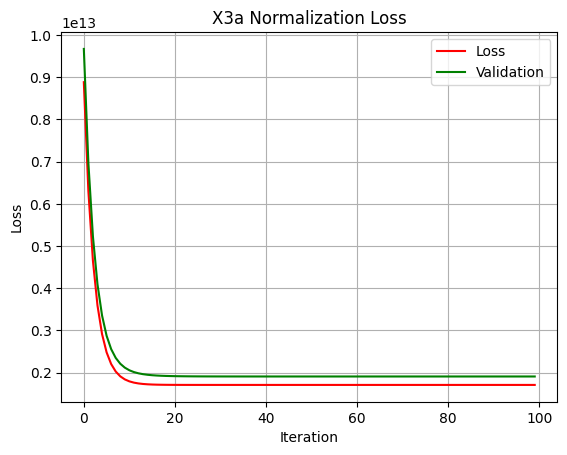

In [18]:
# Perform regression on normalized inputs

learnSize = 20
learnRange = np.linspace(0.01, 0.1, learnSize, endpoint=True)
errorOut = []
thetaArray = []
lossArray = []
valArray = []
for learnRate in learnRange:
    theta_x2a_norm = np.zeros(6)
    theta_x2a_norm, loss, val = gradDes_paramPen(X2a_norm_train, train_Y, X2a_norm_test, test_Y, theta_x2a_norm, learnRate, iterations, 1)
    lossArray.append(loss)
    valArray.append(val)
    thetaArray.append(theta_x2a_norm)
    errorOut.append(lineReg(X2a_norm_test, test_Y, theta_x2a_norm))

idx = np.argmin(errorOut)
print("Learn rate with lowest error is {:.2f}, min error = {:f}".format(learnRange[idx], np.min(errorOut)))
print("Variables Found:\n\ttheta0 = {:.5f}\n\ttheta1 = {:.5f}\n\ttheta2 = {:.5f}\n\ttheta3 = {:.5f}\n\ttheta4 = {:.5f}\n\ttheta5 = {:.5f}".format(
    thetaArray[idx][0], thetaArray[idx][1], thetaArray[idx][2], thetaArray[idx][3], thetaArray[idx][4], thetaArray[idx][5])
)

plt.plot(range(iterations),lossArray[idx], color="red", label = "Loss")
plt.plot(range(iterations),valArray[idx], color="green", label = "Validation")
plt.title("X3a Normalization Loss")
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.grid()
plt.legend()

Learn rate with lowest error is 0.08, min error = 855730746519.774414
Variables Found:
	theta0 = 4715797.24123
	theta1 = 741554.03075
	theta2 = 90808.55839
	theta3 = 571177.40319
	theta4 = 490800.80300
	theta5 = 290111.56940


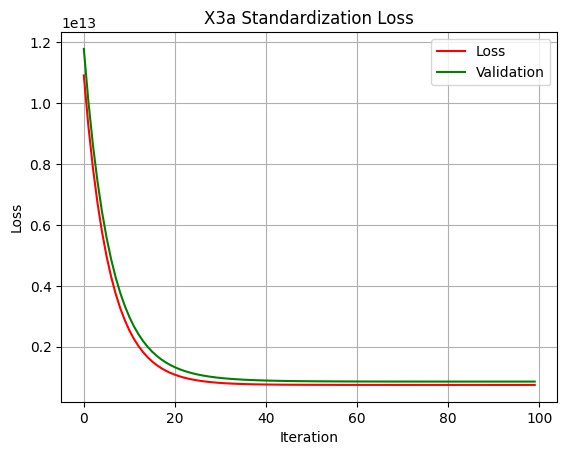

In [19]:
# Perform regression on standardized inputs

learnSize = 20
learnRange = np.linspace(0.01, 0.1, learnSize, endpoint=True)
errorOut = []
thetaArray = []
lossArray = []
valArray = []
for learnRate in learnRange:
    theta_x2a_std = np.zeros(6)
    theta_x2a_std, loss, val = gradDes_paramPen(X2a_std_train, train_Y, X2a_std_test, test_Y, theta_x2a_std, learnRate, iterations, 1)
    lossArray.append(loss)
    valArray.append(val)
    thetaArray.append(theta_x2a_std)
    errorOut.append(lineReg(X2a_std_test, test_Y, theta_x2a_std))

idx = np.argmin(errorOut)
print("Learn rate with lowest error is {:.2f}, min error = {:f}".format(learnRange[idx], np.min(errorOut)))
print("Variables Found:\n\ttheta0 = {:.5f}\n\ttheta1 = {:.5f}\n\ttheta2 = {:.5f}\n\ttheta3 = {:.5f}\n\ttheta4 = {:.5f}\n\ttheta5 = {:.5f}".format(
    thetaArray[idx][0], thetaArray[idx][1], thetaArray[idx][2], thetaArray[idx][3], thetaArray[idx][4], thetaArray[idx][5])
)

plt.plot(range(iterations),lossArray[idx], color="red", label = "Loss")
plt.plot(range(iterations),valArray[idx], color="green", label = "Validation")
plt.title("X3a Standardization Loss")
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.grid()
plt.legend()

### Part b

Learn rate with lowest error is 0.10, min error = 1906675539824.993408
Variables Found:
	theta0 = 2365093.74161
	theta1 = 2365094.40138
	theta2 = -165.79209
	theta3 = 389.63049
	theta4 = 583.04478
	theta5 = 133.64170


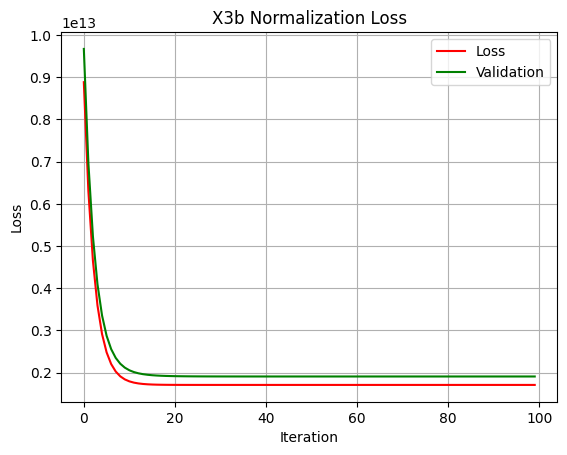

In [20]:
# Perform regression on normalized inputs

learnSize = 20
learnRange = np.linspace(0.01, 0.1, learnSize, endpoint=True)
errorOut = []
thetaArray = []
lossArray = []
valArray = []
for learnRate in learnRange:
    theta_x2b_norm = np.zeros(12)
    theta_x2b_norm, loss, val = gradDes_paramPen(X2b_norm_train, train_Y, X2b_norm_test, test_Y, theta_x2b_norm, learnRate, iterations, 1)
    lossArray.append(loss)
    valArray.append(val)
    thetaArray.append(theta_x2b_norm)
    errorOut.append(lineReg(X2b_norm_test, test_Y, theta_x2b_norm))

idx = np.argmin(errorOut)
print("Learn rate with lowest error is {:.2f}, min error = {:f}".format(learnRange[idx], np.min(errorOut)))
print("Variables Found:\n\ttheta0 = {:.5f}\n\ttheta1 = {:.5f}\n\ttheta2 = {:.5f}\n\ttheta3 = {:.5f}\n\ttheta4 = {:.5f}\n\ttheta5 = {:.5f}".format(
    thetaArray[idx][0], thetaArray[idx][1], thetaArray[idx][2], thetaArray[idx][3], thetaArray[idx][4], thetaArray[idx][5])
)

plt.plot(range(iterations),lossArray[idx], color="red", label = "Loss")
plt.plot(range(iterations),valArray[idx], color="green", label = "Validation")
plt.title("X3b Normalization Loss")
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.grid()
plt.legend()

Learn rate with lowest error is 0.09, min error = 689668393208.936401
Variables Found:
	theta0 = 4716826.63228
	theta1 = 554055.35190
	theta2 = 60509.14355
	theta3 = 532177.82017
	theta4 = 401252.91319
	theta5 = 149423.00227


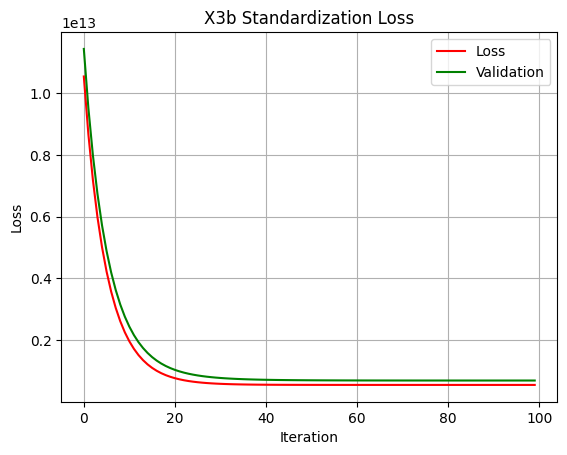

In [21]:
# Perform regression on standardized inputs

learnSize = 20
learnRange = np.linspace(0.01, 0.1, learnSize, endpoint=True)
errorOut = []
thetaArray = []
lossArray = []
valArray = []
for learnRate in learnRange:
    theta_x2b_std = np.zeros(12)
    theta_x2b_std, loss, val = gradDes_paramPen(X2b_std_train, train_Y, X2b_std_test, test_Y, theta_x2b_std, learnRate, iterations, 1)
    lossArray.append(loss)
    valArray.append(val)
    thetaArray.append(theta_x2b_std)
    errorOut.append(lineReg(X2b_std_test, test_Y, theta_x2b_std))

idx = np.argmin(errorOut)
print("Learn rate with lowest error is {:.2f}, min error = {:f}".format(learnRange[idx], np.min(errorOut)))
print("Variables Found:\n\ttheta0 = {:.5f}\n\ttheta1 = {:.5f}\n\ttheta2 = {:.5f}\n\ttheta3 = {:.5f}\n\ttheta4 = {:.5f}\n\ttheta5 = {:.5f}".format(
    thetaArray[idx][0], thetaArray[idx][1], thetaArray[idx][2], thetaArray[idx][3], thetaArray[idx][4], thetaArray[idx][5])
)

plt.plot(range(iterations),lossArray[idx], color="red", label = "Loss")
plt.plot(range(iterations),valArray[idx], color="green", label = "Validation")
plt.title("X3b Standardization Loss")
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.grid()
plt.legend()